# FastFood Calories Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d ulrikthygepedersen/fastfood-nutrition

Dataset URL: https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition
License(s): Attribution 4.0 International (CC BY 4.0)
  0%|                                               | 0.00/11.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.8k/11.8k [00:00<00:00, 35.9MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/FastFood Calories Prediction/fastfood-nutrition.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/FastFood Calories Prediction')
zip_ref.close()

## Explratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('fastfood.csv')

In [5]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [6]:
df.shape

(515, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,515.0,530.912621,282.436147,20.0,330.0,490.0,690.0,2430.0
cal_fat,515.0,238.813592,166.407510,0.0,120.0,210.0,310.0,1270.0
total_fat,515.0,26.590291,18.411876,0.0,14.0,23.0,35.0,141.0
sat_fat,515.0,8.153398,6.418811,0.0,4.0,7.0,11.0,47.0
trans_fat,515.0,0.465049,0.839644,0.0,0.0,0.0,1.0,8.0
cholesterol,515.0,72.456311,63.160406,0.0,35.0,60.0,95.0,805.0
sodium,515.0,1246.737864,689.954278,15.0,800.0,1110.0,1550.0,6080.0
total_carb,515.0,45.664078,24.883342,0.0,28.5,44.0,57.0,156.0
fiber,503.0,4.137177,3.037460,0.0,2.0,3.0,5.0,17.0
sugar,515.0,7.262136,6.761301,0.0,3.0,6.0,9.0,87.0


In [9]:
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [10]:

df.duplicated().sum()

np.int64(2)

In [11]:
df.nunique()

restaurant       8
item           505
calories       113
cal_fat        117
total_fat       80
sat_fat         40
trans_fat       10
cholesterol     52
sodium         197
total_carb     103
fiber           18
sugar           31
protein         70
vit_a           21
vit_c           23
calcium         26
salad            1
dtype: int64

## Data Visualization

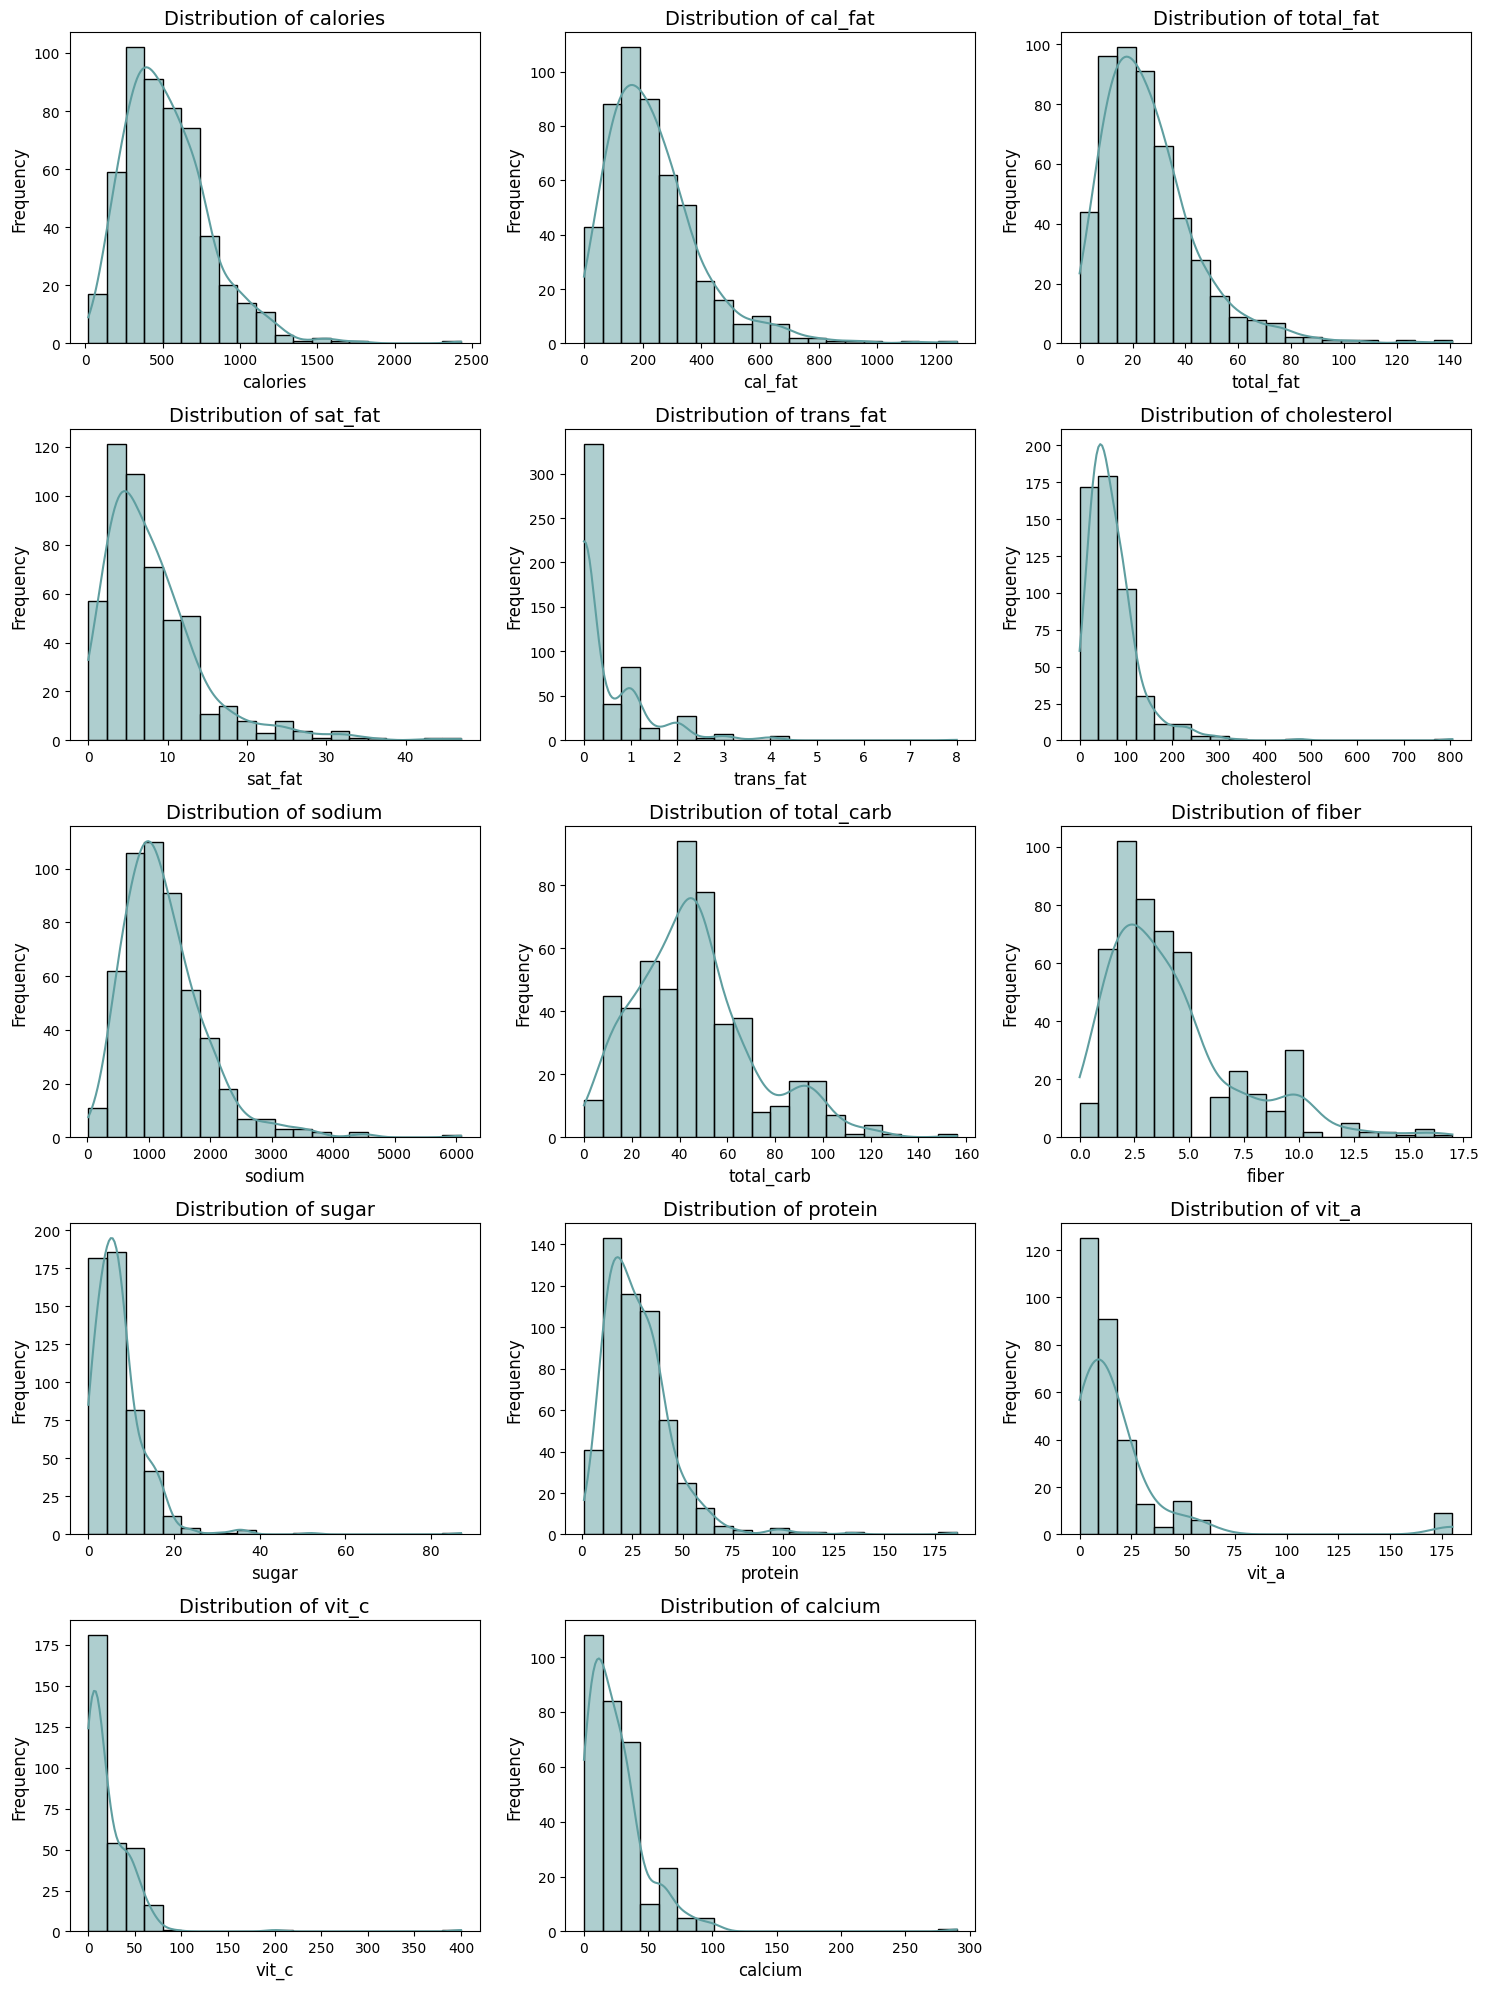

In [12]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

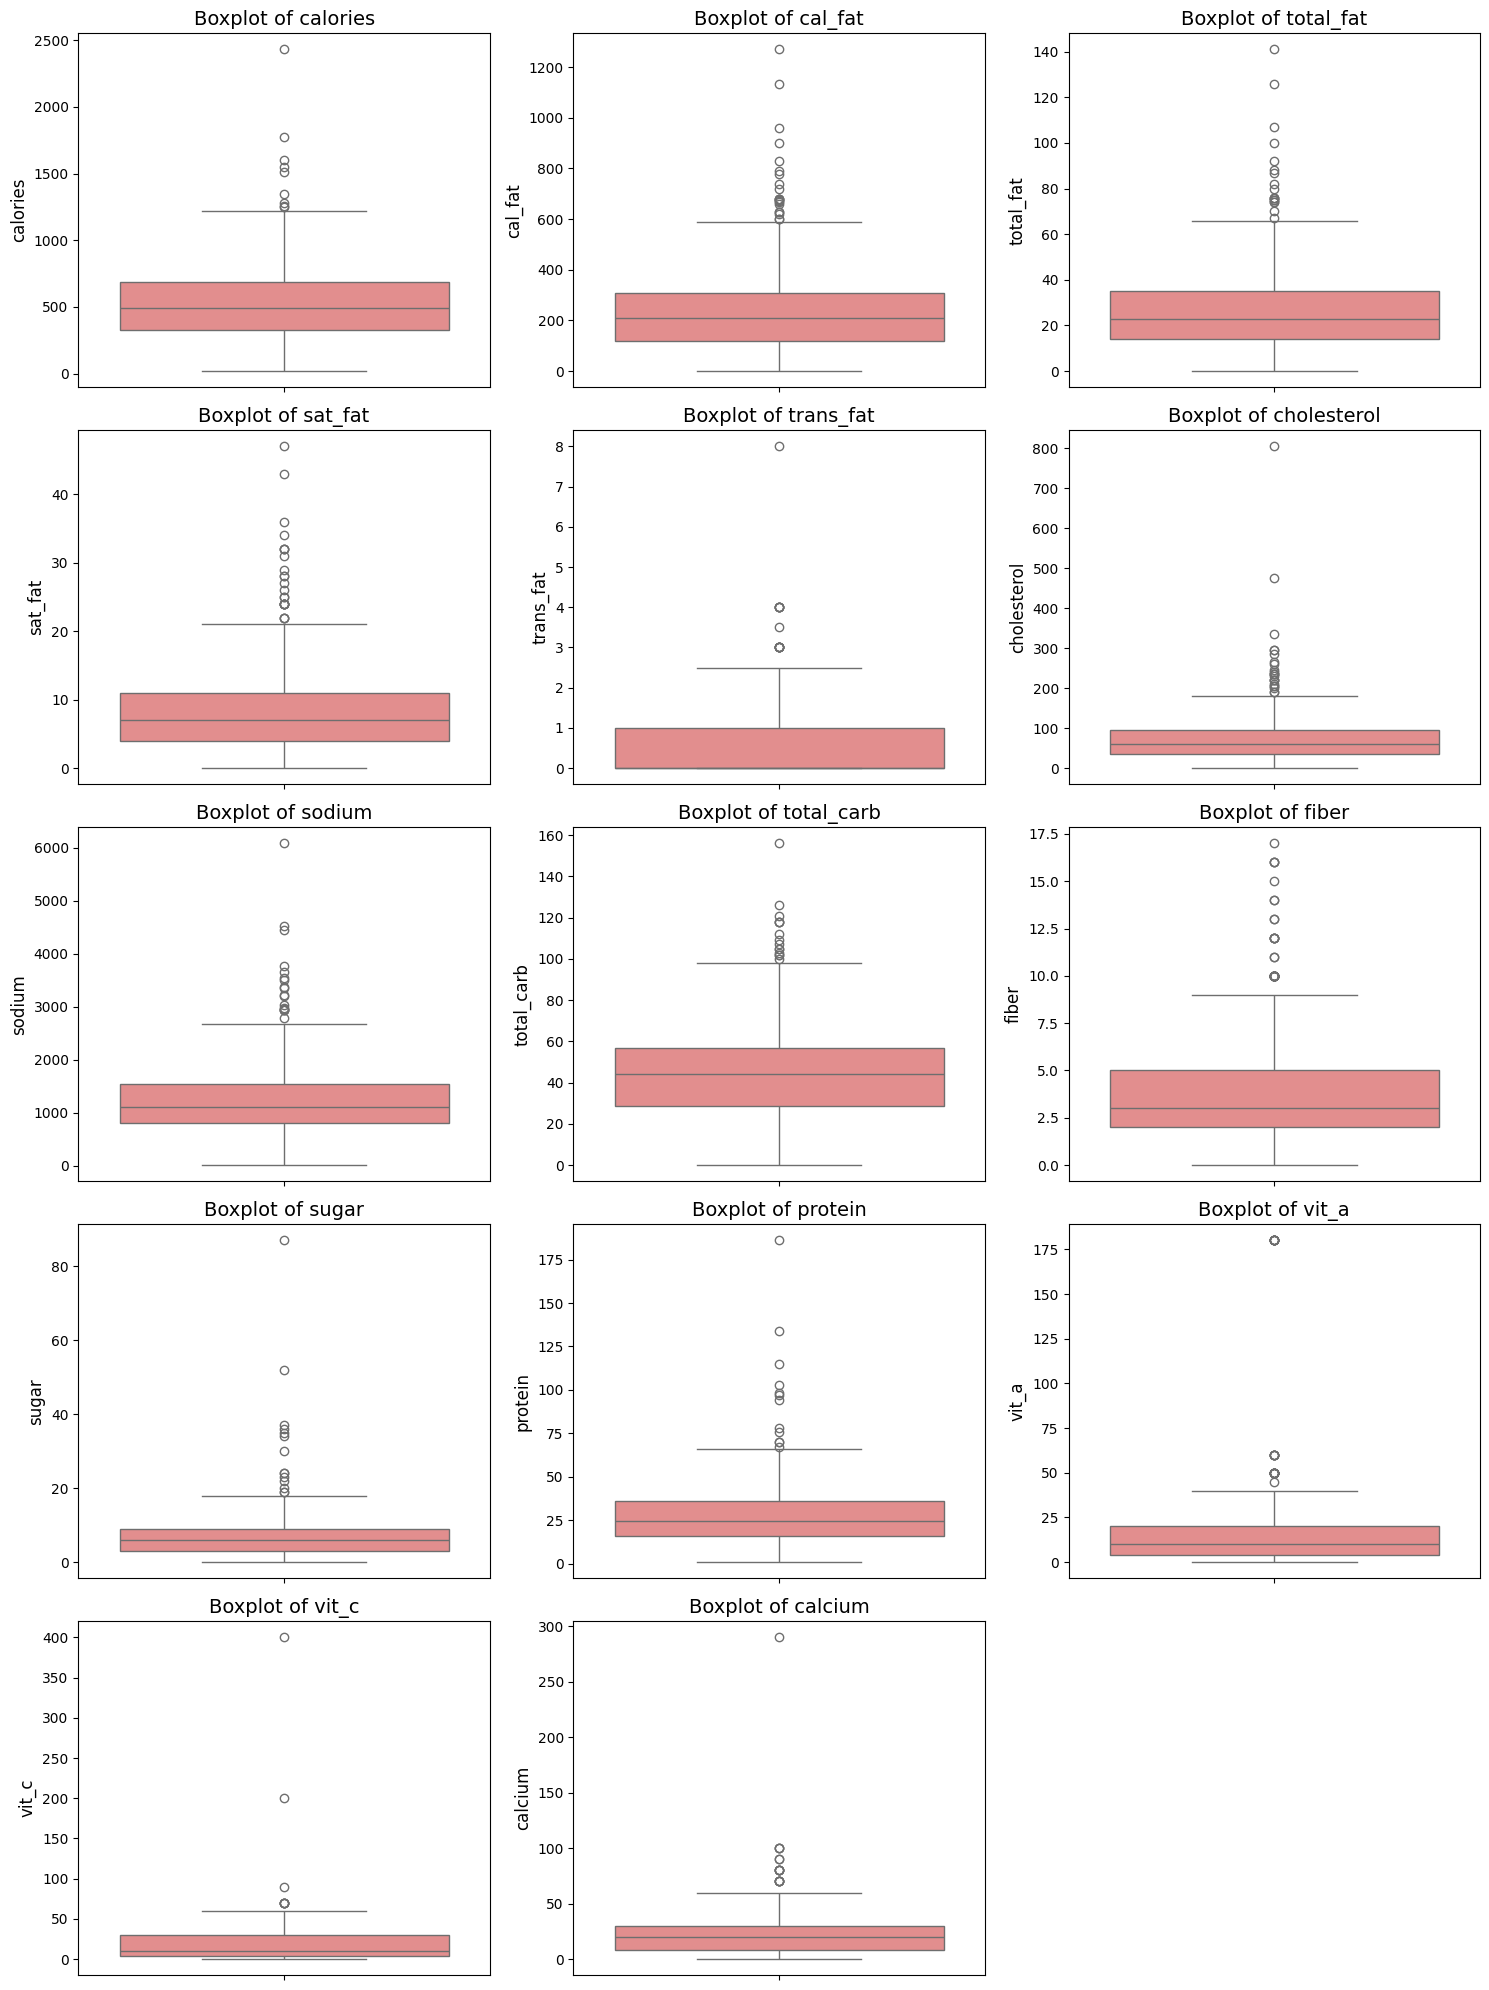

In [13]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

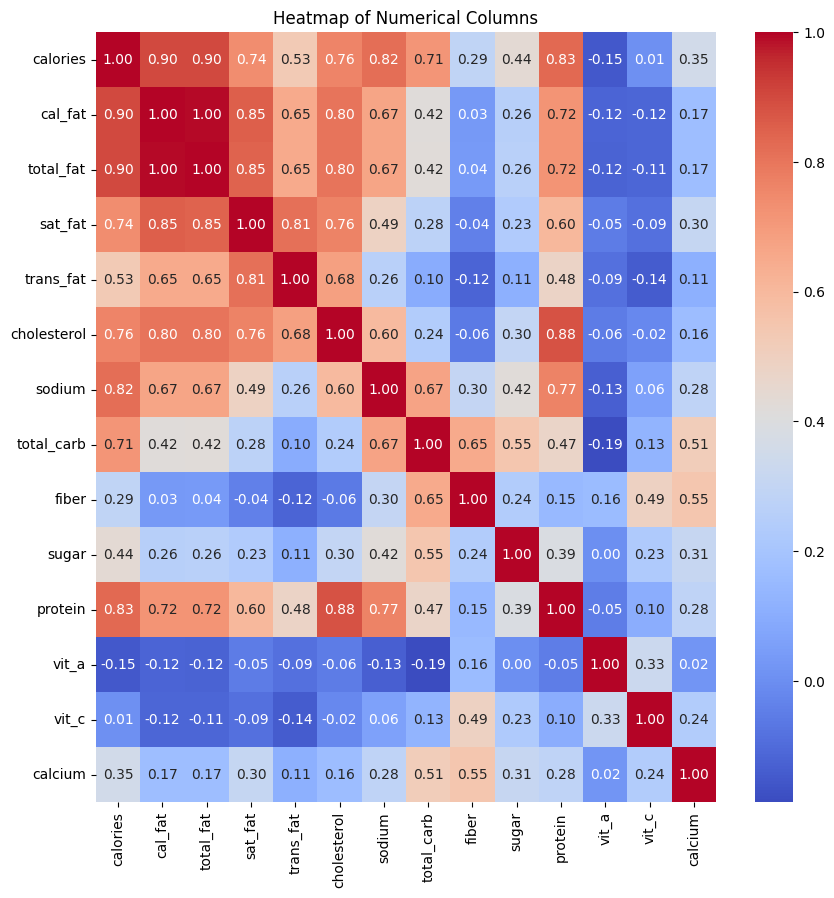

In [14]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [15]:
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [ ]:
# Dropping unwanted column

df.drop(columns=['vit_a','vit_c','calcium','salad'], inplace=True)

In [17]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [18]:
# Filling null values with mean

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [19]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [20]:
X = df.drop(columns=['calories'])
y = df['calories']

In [21]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [22]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [23]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [24]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.9879900305633774,
 0.9805548787117004,
 0.9834264303735732,
 0.9413921116470677,
 0.9878956760361961,
 0.978228864671482,
 0.959528876204777,
 0.6375964198070282,
 0.9064820057983075]